In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [6]:
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(file_path, delimiter=";")

In [8]:
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
X = data.drop(columns=['quality'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

In [12]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18921017006463886


In [13]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

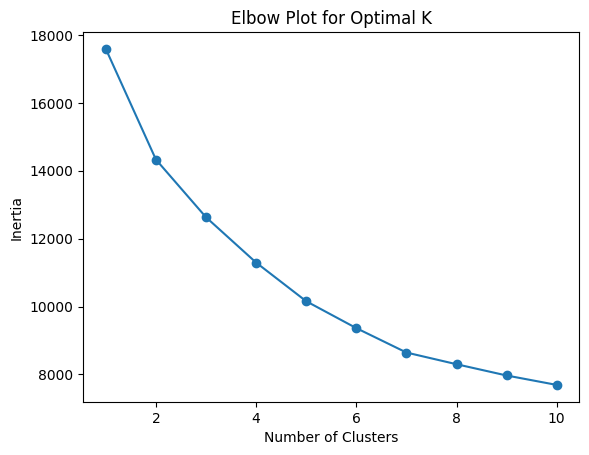

In [14]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

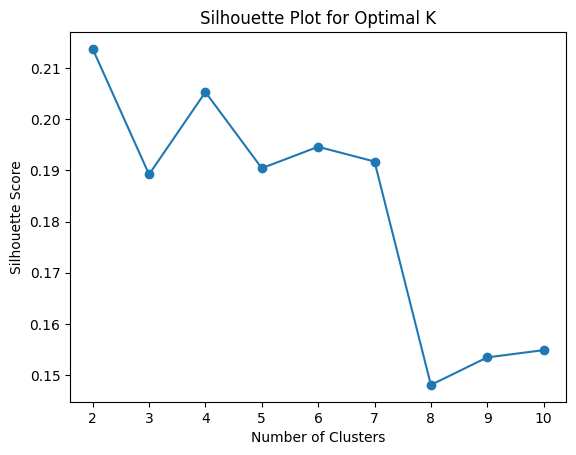

In [17]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Plot for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
df_pca['Cluster'] = cluster_labels

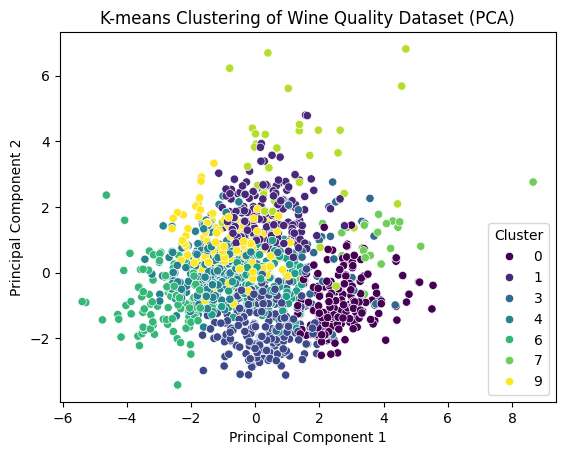

In [19]:
sns.scatterplot(data=df_pca, x='Component 1', y='Component 2', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of Wine Quality Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

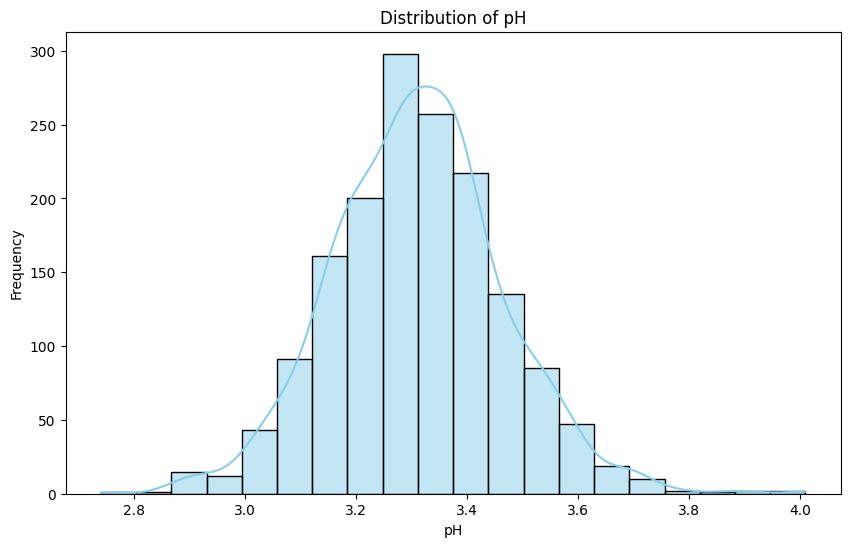

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['pH'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

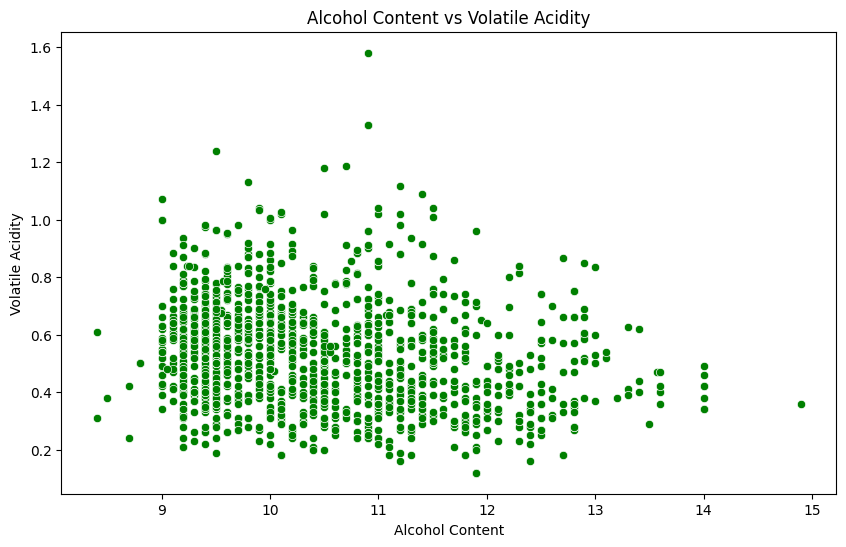

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['alcohol'], y=data['volatile acidity'], color='green')
plt.title('Alcohol Content vs Volatile Acidity')
plt.xlabel('Alcohol Content')
plt.ylabel('Volatile Acidity')
plt.show()

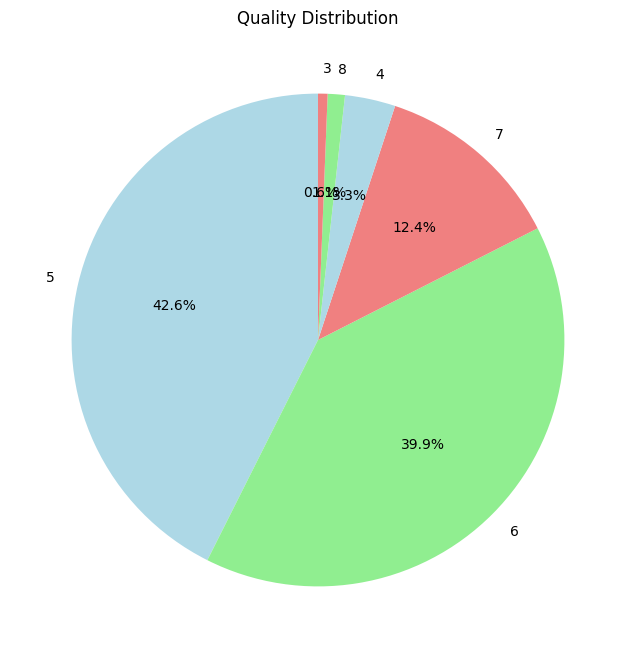

In [22]:
plt.figure(figsize=(8, 8))
sizes = data['quality'].value_counts()
labels = sizes.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90)
plt.title('Quality Distribution')
plt.show()